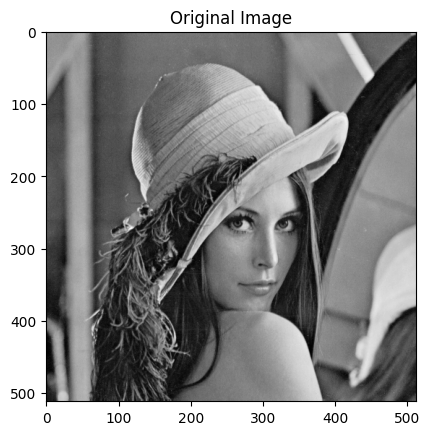

In [1]:
import matplotlib.pyplot as plt
from skimage import io

img_dir = "/Users/guoyixuan/Documents/pythoncode/ccwML/"
imgfile = img_dir + "Lenna.png" # 512x512x3
original_img = io.imread(imgfile, as_gray = True)
plt.imshow(original_img, cmap = 'gray')
plt.title("Original Image")
plt.show()

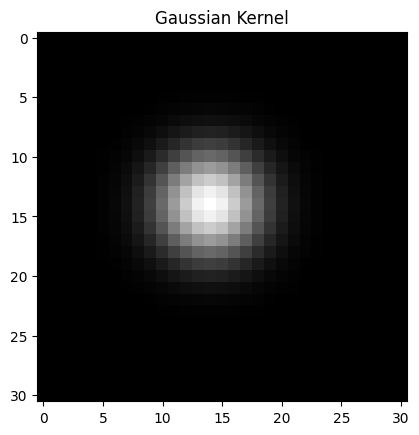

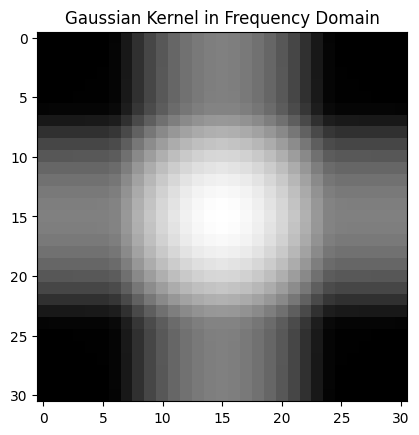

In [2]:
import numpy as np
 
ksize = 31
s = 3 #sigma
m = ksize // 2
X, Y = np.meshgrid(np.arange(1, ksize+1), np.arange(1, ksize+1))

# 二維常態分配（高斯分配）
kernel = (1 / (2 * np.pi * s ** 2)) * np.exp(-((X - m) ** 2 + (Y - m) ** 2) / (2 * s ** 2))
kernel = kernel / np.sum(kernel)
plt.imshow(kernel, cmap = 'gray')
plt.title("Gaussian Kernel")
plt.show()
 
# 二維離散傅立葉轉換
# 顏色變化多的地方就是頻率高的地方
fftkernel = np.fft.fft2(kernel)
fftkernel = np.fft.fftshift(fftkernel)
plt.imshow(np.log(np.abs(fftkernel)), cmap = 'gray')
plt.title("Gaussian Kernel in Frequency Domain")
plt.show()

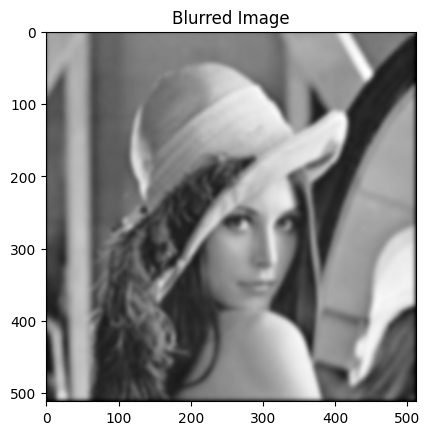

In [3]:
from scipy import signal
# 把lenna變模糊
blur_by_conv = signal.convolve2d(original_img, kernel, mode='same', boundary='fill', fillvalue=0)
plt.imshow(blur_by_conv, cmap = 'gray')
plt.title("Blurred Image")
plt.show()

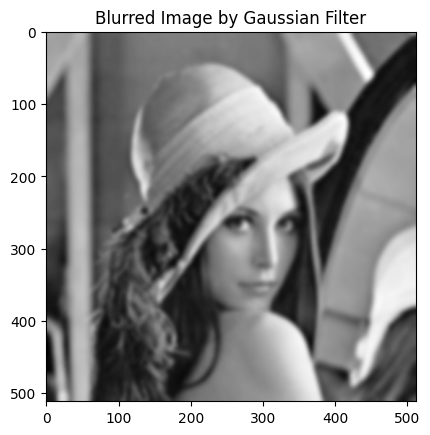

In [4]:
from scipy.ndimage import gaussian_filter
# 直接用gaussian_filter把lenna變模糊
blur_by_gaussian = gaussian_filter(original_img, sigma = 3)
plt.imshow(blur_by_gaussian, cmap = 'gray')
plt.title("Blurred Image by Gaussian Filter")
plt.show()

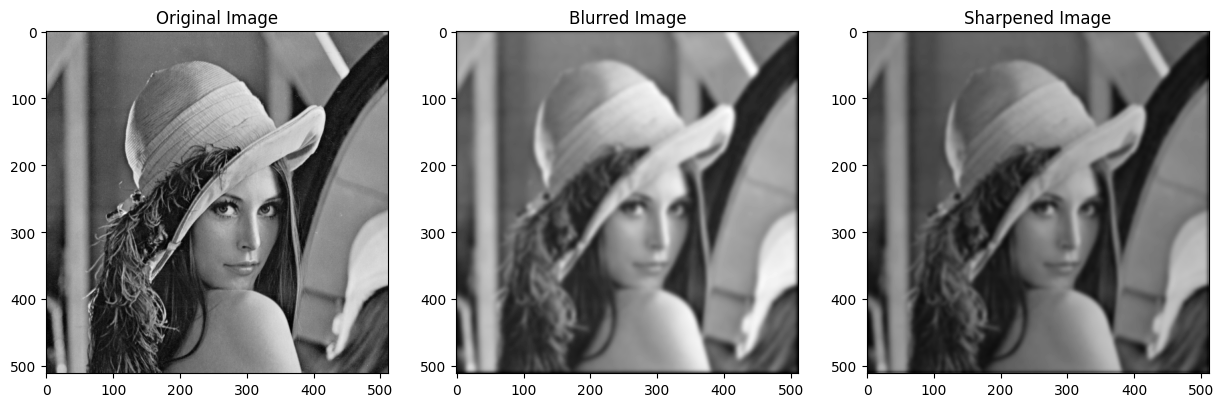

In [5]:
# 如何把模糊的lenna變回來
sharpen_kernel = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]]) # Laplacian kernel
# sharpen_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]]) / 3
# sharpen_kernel = np.array([[1, -2, 1],
#                            [-2, 5, -2],
#                            [1, -2, 1]])
# sharpen_kernel = np.array([[-0.0023, -0.0432, -0.0023],
#                            [-0.0432, 1.182, -0.0432],
#                            [-0.0023, -0.0432, -0.0023]])
sharpen_by_conv = signal.convolve2d(blur_by_conv, sharpen_kernel, mode='same', boundary='fill', fillvalue=0)
 
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].imshow(original_img, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(blur_by_conv, cmap = 'gray')
ax[1].set_title("Blurred Image")
ax[2].imshow(sharpen_by_conv, cmap = 'gray')
ax[2].set_title("Sharpened Image")
plt.show()

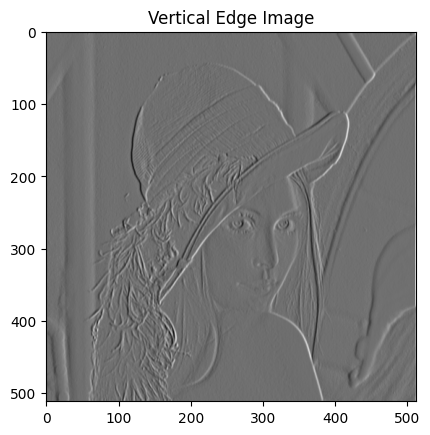

In [6]:
# Detect vertical edges
edge_v_kernel = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]]) # Prewitt
# edge_v_kernel = np.array([[-1.,0.,1.],[-2.,0.,2.],[-1.,0.,1.]])/8 # Sobel
edge_v_by_conv = signal.convolve2d(original_img, edge_v_kernel, mode='same', boundary='fill', fillvalue=0)
plt.imshow(edge_v_by_conv, cmap = 'gray')
plt.title("Vertical Edge Image")
plt.show()

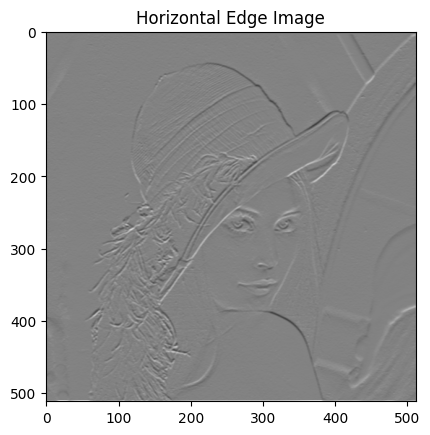

In [7]:
# Detect horizontal edges
# 偵測水平線
edge_h_kernel = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])
# edge_h_kernel = np.array([[-1.,-2.,-1.],[0.,0.,0.],[1.,2.,1.]])/8 # Sobel
edge_h_by_conv = signal.convolve2d(original_img, edge_h_kernel, mode='same', boundary='fill', fillvalue=0)
plt.imshow(edge_h_by_conv, cmap = 'gray')
plt.title("Horizontal Edge Image")
plt.show()

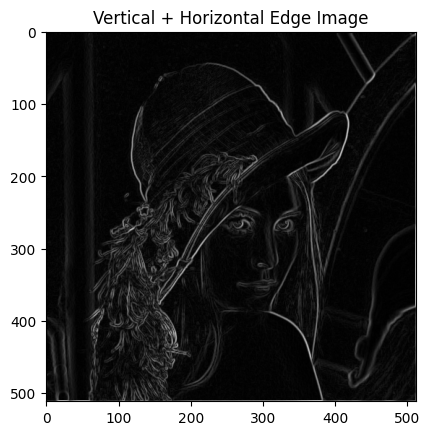

In [8]:
# Detect vertical edges + Detect horizontal edges
# 偵測邊邊
edge_v_h_by_conv = np.sqrt(edge_v_by_conv ** 2 + edge_h_by_conv ** 2)
plt.imshow(edge_v_h_by_conv, cmap = 'gray')
plt.title("Vertical + Horizontal Edge Image")
plt.show()

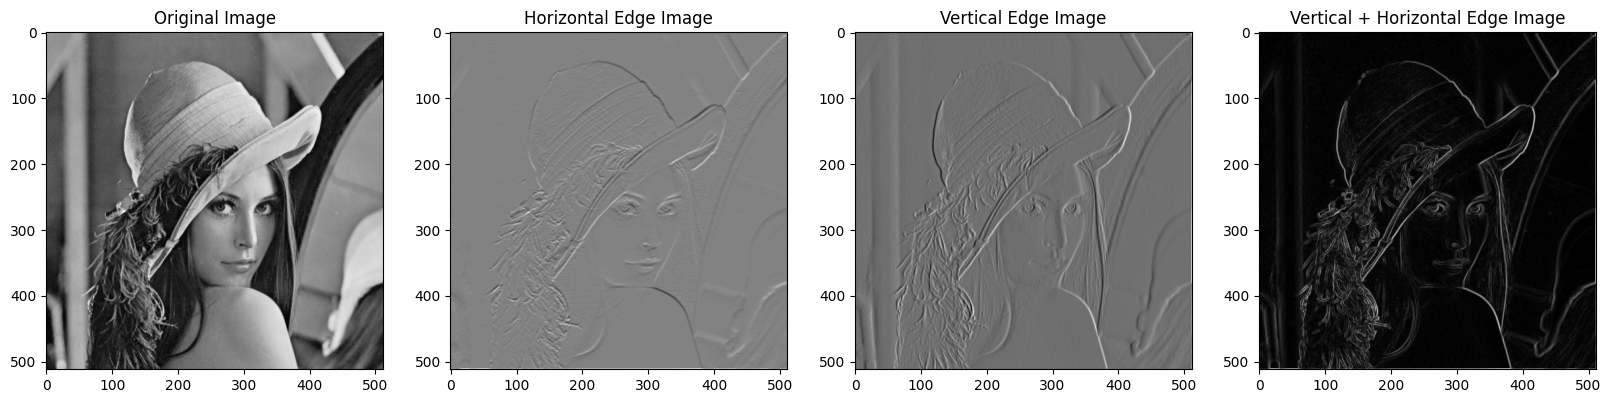

In [9]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
ax[0].imshow(original_img, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(edge_h_by_conv, cmap = 'gray')
ax[1].set_title("Horizontal Edge Image")
ax[2].imshow(edge_v_by_conv, cmap = 'gray')
ax[2].set_title("Vertical Edge Image")
ax[3].imshow(edge_v_h_by_conv, cmap = 'gray')
ax[3].set_title("Vertical + Horizontal Edge Image")
plt.show()

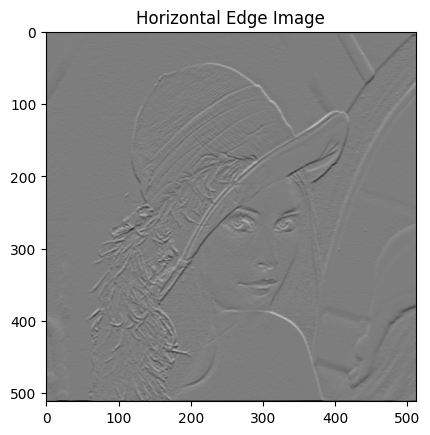

In [10]:
import torch
import torch.nn.functional as F
import torch.nn as nn
 
X_torch = torch.from_numpy(original_img).float()
# edge_h_kernel_torch = torch.tensor([[-1, -1, -1],
#                               [0, 0, 0],
#                               [1, 1, 1]])
X_torch = X_torch.reshape(1, 1, 512, 512) # (batch_size, channel, height, width)
h_torch = torch.from_numpy(edge_h_kernel).float()
h_torch = h_torch.reshape(1, 1, 3, 3) # (out_channel, in_channel, kernel_height, kernel_width)
 
edge_h_by_conv_torch = F.conv2d(X_torch, h_torch, padding = 1)
edge_h_by_conv_numpy = edge_h_by_conv_torch.numpy().squeeze() # (batch_size, channel, height, width) -> (height, width)
 
plt.imshow(edge_h_by_conv_numpy, cmap = 'gray')
plt.title("Horizontal Edge Image")
plt.show()

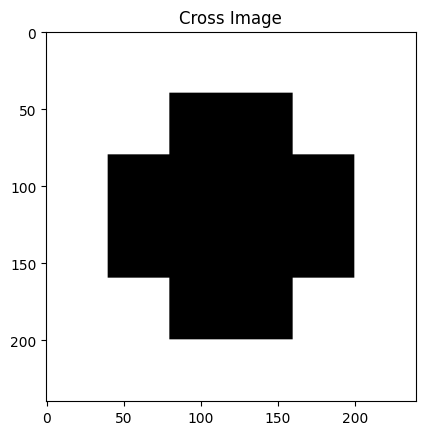

In [11]:
imsz = 240
cross = np.ones((imsz,imsz))
cross[int(imsz/3):int(2*imsz/3),int(imsz/6):int(5*imsz/6)]=0
cross[int(imsz/6):int(5*imsz/6),int(imsz/3):int(2*imsz/3)]=0
fig = plt.figure()
plt.imshow(cross, cmap = 'gray')
plt.title("Cross Image")
plt.show()

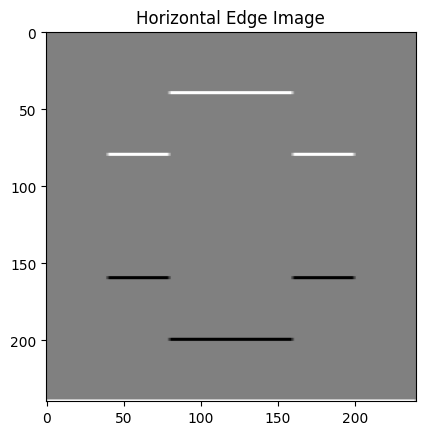

In [12]:
cross_edge_h_by_conv = signal.convolve2d(cross, edge_h_kernel, mode='same', boundary='fill', fillvalue=0)
plt.imshow(cross_edge_h_by_conv, cmap = 'gray')
plt.title("Horizontal Edge Image")
plt.show()

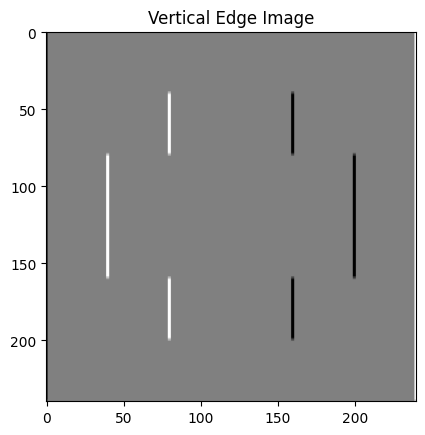

In [13]:
cross_edge_v_by_conv = signal.convolve2d(cross, edge_v_kernel, mode='same', boundary='fill', fillvalue=0)
plt.imshow(cross_edge_v_by_conv, cmap = 'gray')
plt.title("Vertical Edge Image")
plt.show()

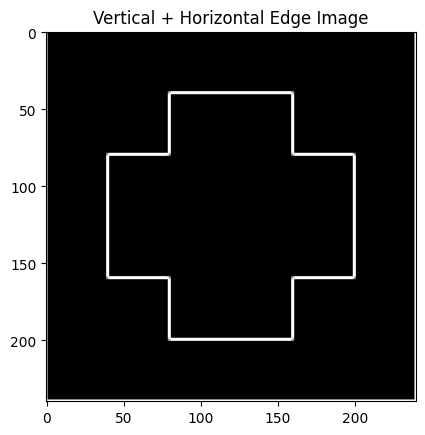

In [14]:
corss_v_h_by_conv = np.sqrt(cross_edge_v_by_conv ** 2 + cross_edge_h_by_conv ** 2)
plt.imshow(corss_v_h_by_conv, cmap = 'gray')
plt.title("Vertical + Horizontal Edge Image")
plt.show()